# **Libraries**


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [40]:
from ta.trend import AroonIndicator, CCIIndicator, ADXIndicator, EMAIndicator
from ta.momentum import RSIIndicator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# **Loading the Dataset**

In [41]:
df = pd.read_csv('Bitcoin_Data.csv')

# **Exploration, Cleaning & Transformation**

In [42]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024","57,343.17","58,534.36","57,330.10","58,127.01","58,127.01","33,835,707,949"
1,"Sep 11, 2024","57,650.29","57,991.32","55,567.34","57,343.17","57,343.17","37,049,062,672"
2,"Sep 10, 2024","57,020.10","58,029.98","56,419.41","57,648.71","57,648.71","28,857,630,507"
3,"Sep 9, 2024","54,851.89","58,041.13","54,598.43","57,019.54","57,019.54","34,618,096,173"
4,"Sep 8, 2024","54,147.93","55,300.86","53,653.76","54,841.57","54,841.57","18,268,287,531"


In [43]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1787,"Oct 22, 2019","8,243.40","8,296.65","8,074.46","8,078.20","8,078.20","16,803,377,857"
1788,"Oct 21, 2019","8,225.12","8,296.69","8,196.42","8,243.72","8,243.72","15,868,748,866"
1789,"Oct 20, 2019","7,997.81","8,281.82","7,949.44","8,222.08","8,222.08","15,504,249,442"
1790,"Oct 19, 2019","7,973.80","8,082.63","7,944.78","7,988.56","7,988.56","13,797,825,640"
1791,"Oct 18, 2019","8,100.93","8,138.41","7,902.16","7,973.21","7,973.21","15,651,592,610"


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1792 non-null   object
 1   Open       1792 non-null   object
 2   High       1792 non-null   object
 3   Low        1792 non-null   object
 4   Close      1792 non-null   object
 5   Adj Close  1792 non-null   object
 6   Volume     1792 non-null   object
dtypes: object(7)
memory usage: 98.1+ KB


In [45]:
df.shape

(1792, 7)

The dataset contains 1792 rows and 7 cols and the intial datatype of all the elems is object(str)

In [46]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1792,1792,1792,1792,1792,1792,1792
unique,1792,1791,1792,1791,1792,1792,1792
top,"Sep 12, 2024","7,410.45","58,534.36","27,375.60","58,127.01","58,127.01","33,835,707,949"
freq,1,2,1,2,1,1,1


In [47]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [48]:
df.duplicated().sum()

0

In [49]:
df_cleaned = df.drop_duplicates()


In [50]:
df_cleaned.duplicated().sum()

0

In [51]:
df_cleaned.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024","57,343.17","58,534.36","57,330.10","58,127.01","58,127.01","33,835,707,949"
1,"Sep 11, 2024","57,650.29","57,991.32","55,567.34","57,343.17","57,343.17","37,049,062,672"
2,"Sep 10, 2024","57,020.10","58,029.98","56,419.41","57,648.71","57,648.71","28,857,630,507"
3,"Sep 9, 2024","54,851.89","58,041.13","54,598.43","57,019.54","57,019.54","34,618,096,173"
4,"Sep 8, 2024","54,147.93","55,300.86","53,653.76","54,841.57","54,841.57","18,268,287,531"


In [52]:
df_cleaned.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1787,"Oct 22, 2019","8,243.40","8,296.65","8,074.46","8,078.20","8,078.20","16,803,377,857"
1788,"Oct 21, 2019","8,225.12","8,296.69","8,196.42","8,243.72","8,243.72","15,868,748,866"
1789,"Oct 20, 2019","7,997.81","8,281.82","7,949.44","8,222.08","8,222.08","15,504,249,442"
1790,"Oct 19, 2019","7,973.80","8,082.63","7,944.78","7,988.56","7,988.56","13,797,825,640"
1791,"Oct 18, 2019","8,100.93","8,138.41","7,902.16","7,973.21","7,973.21","15,651,592,610"


Till this step we got the info regarding the dataset and we now know that their aren't any missing vals and also the duplicated vals (if there were would have been detetcted and removed)


In [53]:
#updating the orignal dataset
df = df_cleaned


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1792 non-null   object
 1   Open       1792 non-null   object
 2   High       1792 non-null   object
 3   Low        1792 non-null   object
 4   Close      1792 non-null   object
 5   Adj Close  1792 non-null   object
 6   Volume     1792 non-null   object
dtypes: object(7)
memory usage: 98.1+ KB


In [55]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024","57,343.17","58,534.36","57,330.10","58,127.01","58,127.01","33,835,707,949"
1,"Sep 11, 2024","57,650.29","57,991.32","55,567.34","57,343.17","57,343.17","37,049,062,672"
2,"Sep 10, 2024","57,020.10","58,029.98","56,419.41","57,648.71","57,648.71","28,857,630,507"
3,"Sep 9, 2024","54,851.89","58,041.13","54,598.43","57,019.54","57,019.54","34,618,096,173"
4,"Sep 8, 2024","54,147.93","55,300.86","53,653.76","54,841.57","54,841.57","18,268,287,531"


In [56]:
#defining num_cols before hand to reuse it again instead of typing again
num_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [57]:
# Remove commas from numeric vals and convert cols to float
#as all the cols are in object(str) datatype
for col in num_cols:
    df[col] = df[col].str.replace(',', '').astype(float)



In [58]:
df.info() #checking again after conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1792 non-null   object 
 1   Open       1792 non-null   float64
 2   High       1792 non-null   float64
 3   Low        1792 non-null   float64
 4   Close      1792 non-null   float64
 5   Adj Close  1792 non-null   float64
 6   Volume     1792 non-null   float64
dtypes: float64(6), object(1)
memory usage: 98.1+ KB


In [59]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024",57343.17,58534.36,57330.10,58127.01,58127.01,3.383571e+10
1,"Sep 11, 2024",57650.29,57991.32,55567.34,57343.17,57343.17,3.704906e+10
2,"Sep 10, 2024",57020.10,58029.98,56419.41,57648.71,57648.71,2.885763e+10
3,"Sep 9, 2024",54851.89,58041.13,54598.43,57019.54,57019.54,3.461810e+10
4,"Sep 8, 2024",54147.93,55300.86,53653.76,54841.57,54841.57,1.826829e+10


In [60]:
# Checking outliers using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)

Used IQR because of the nature of data. As crypto data is highly volatile and may not be normally distributed due to extreme fluctuations. If the data had been of other nature i.e. it was normally distributed or didn't have data with extreme fluctuation then Z score would have been a better option.

In [61]:
outliers_count = outliers.sum()
print(outliers_count)

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume       75
dtype: int64


As we can see we have 75 outliers in Volume ( which is expected to have outliers in terms of market movement), we'll ignore that because of cryptocurrency data and it's data can have volatility and sudden spikes due to the nature of the market, so there may be outliers which may be important for capturing extreme price shifts and doing predicting based on them. Also these extreme points can sometimes give us valuable insights.


In [62]:
#Transformation
# Convert Date col to datetime
df['Date']=pd.to_datetime(df['Date'])

#already converted rest of the cols as they had to be done before

In [63]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-09-12,57343.17,58534.36,57330.10,58127.01,58127.01,3.383571e+10
1,2024-09-11,57650.29,57991.32,55567.34,57343.17,57343.17,3.704906e+10
2,2024-09-10,57020.10,58029.98,56419.41,57648.71,57648.71,2.885763e+10
3,2024-09-09,54851.89,58041.13,54598.43,57019.54,57019.54,3.461810e+10
4,2024-09-08,54147.93,55300.86,53653.76,54841.57,54841.57,1.826829e+10


In [64]:
#sorting the dates for better order
df_sorted = df.sort_values(by='Date', ascending=True)

In [65]:
df = df_sorted

In [66]:
#setting date as index
df.set_index('Date', inplace=True)

In [67]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-08,54147.93,55300.86,53653.76,54841.57,54841.57,1.826829e+10
2024-09-09,54851.89,58041.13,54598.43,57019.54,57019.54,3.461810e+10
2024-09-10,57020.10,58029.98,56419.41,57648.71,57648.71,2.885763e+10
2024-09-11,57650.29,57991.32,55567.34,57343.17,57343.17,3.704906e+10
2024-09-12,57343.17,58534.36,57330.10,58127.01,58127.01,3.383571e+10


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1792 entries, 2019-10-18 to 2024-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1792 non-null   float64
 1   High       1792 non-null   float64
 2   Low        1792 non-null   float64
 3   Close      1792 non-null   float64
 4   Adj Close  1792 non-null   float64
 5   Volume     1792 non-null   float64
dtypes: float64(6)
memory usage: 98.0 KB


In [69]:
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
volume_column = ['Volume']

No categorical cols are present in this data so no need for label/one-hot encoding

---------------------------------------------------------------------------------------------------------------------------------

# **EDA**

# Univariate Analysis:

In [70]:
continuous_vars = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']



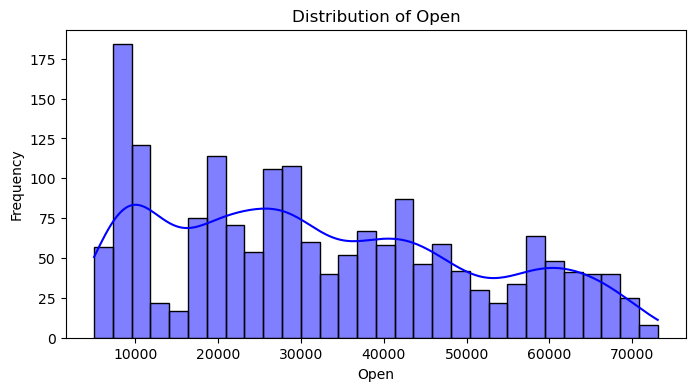

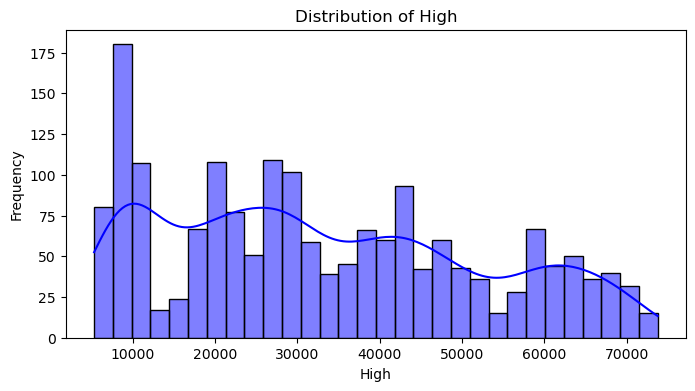

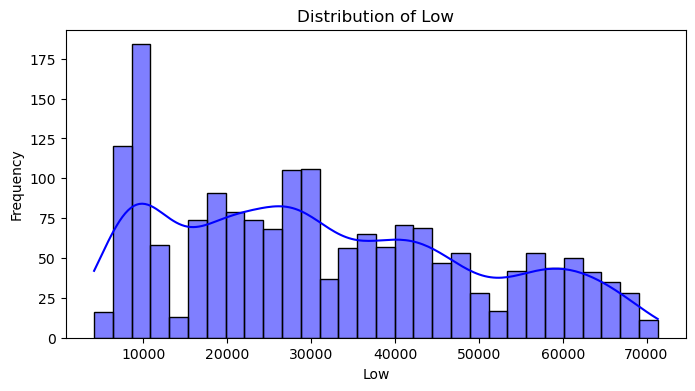

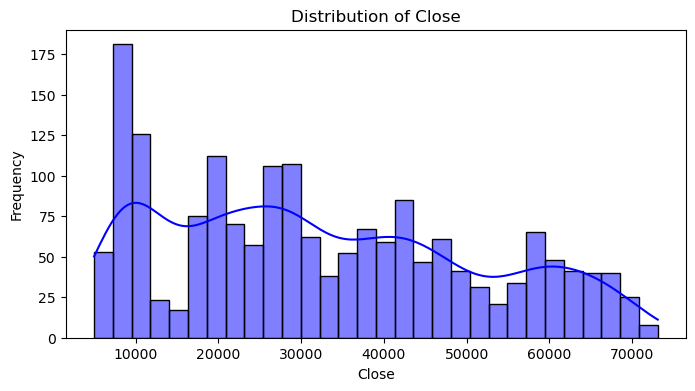

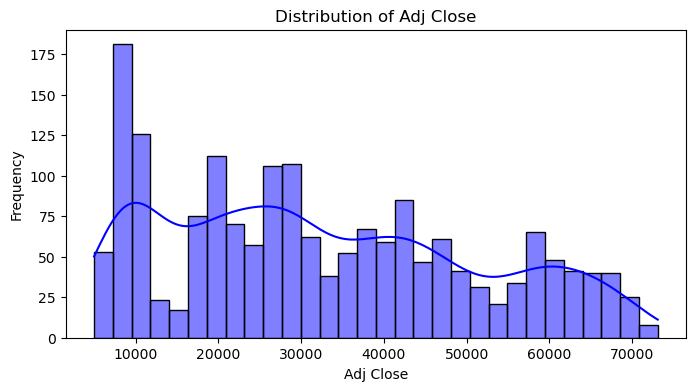

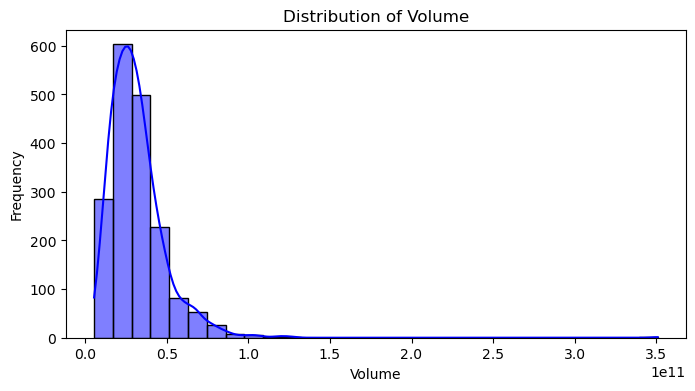

In [71]:
# Plot histograms for distribution analysis
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

extreme vals present in volume

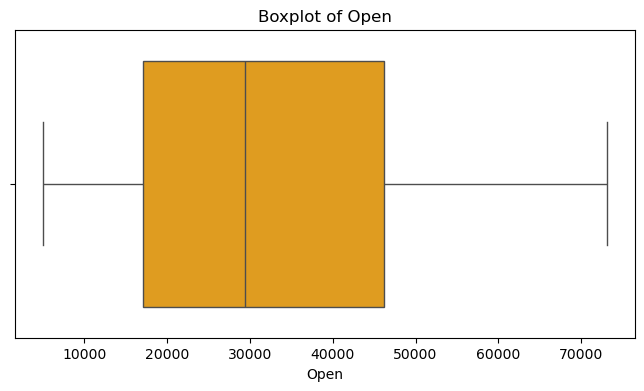

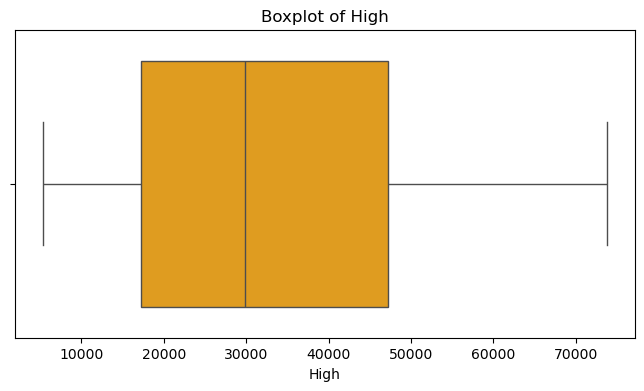

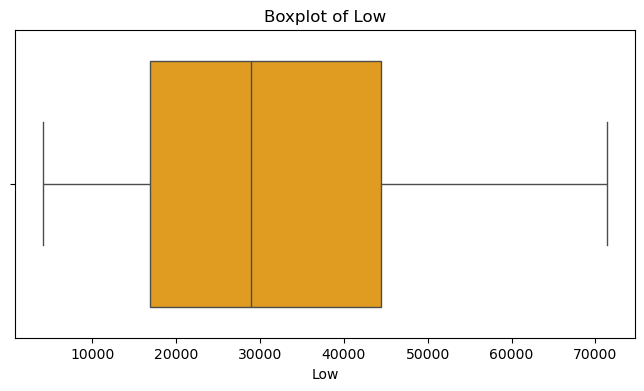

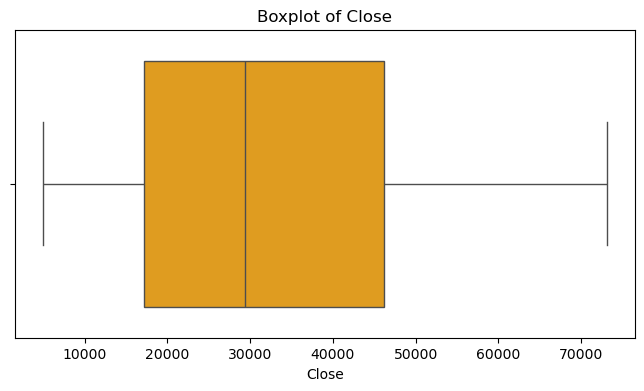

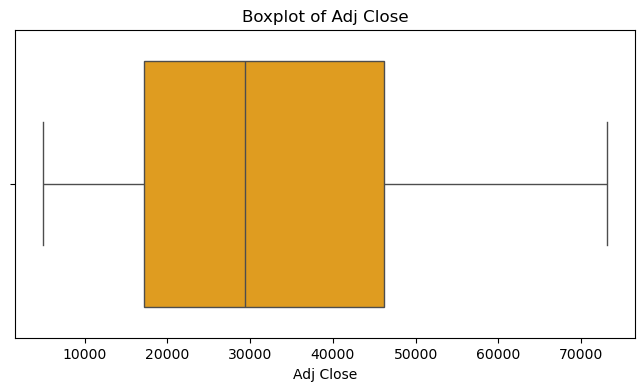

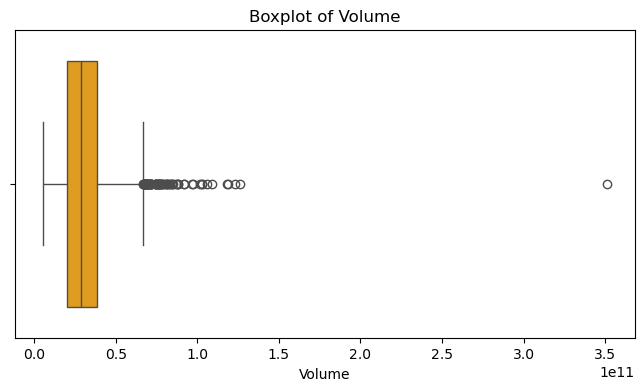

In [72]:
# Plot box plots for outlier detection
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var], color='orange')
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.show()



outliers present in volume data, which is obvious in crypto data
also discussed before with IQR

# Bivariate and Multivariate Analysis:

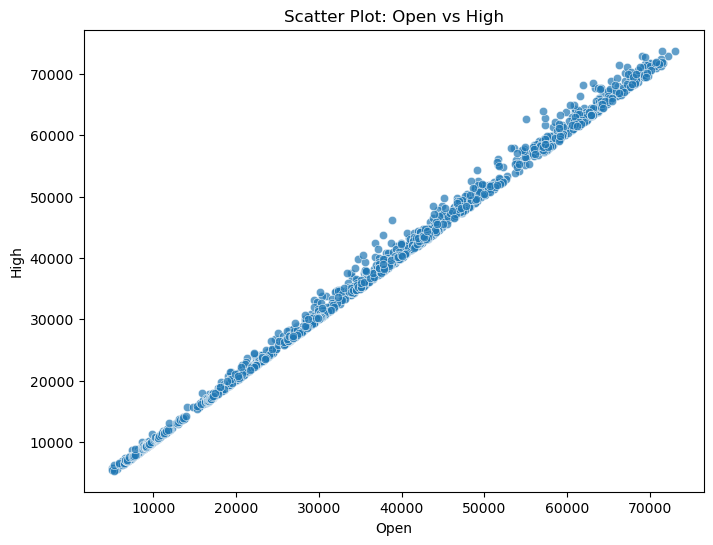

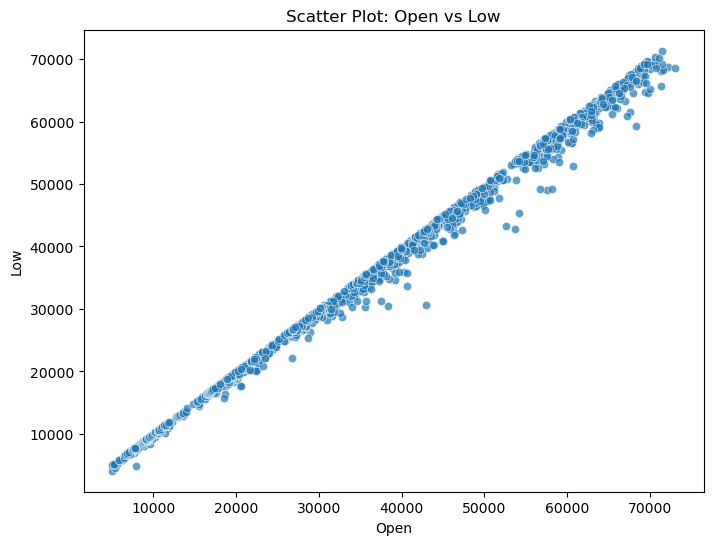

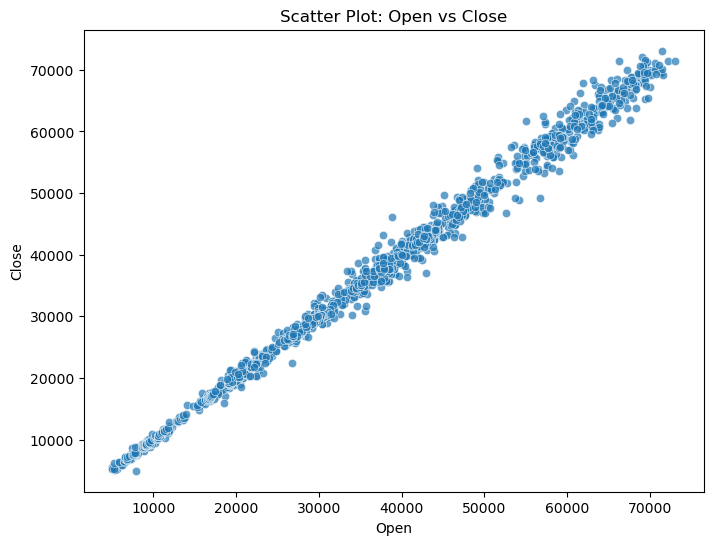

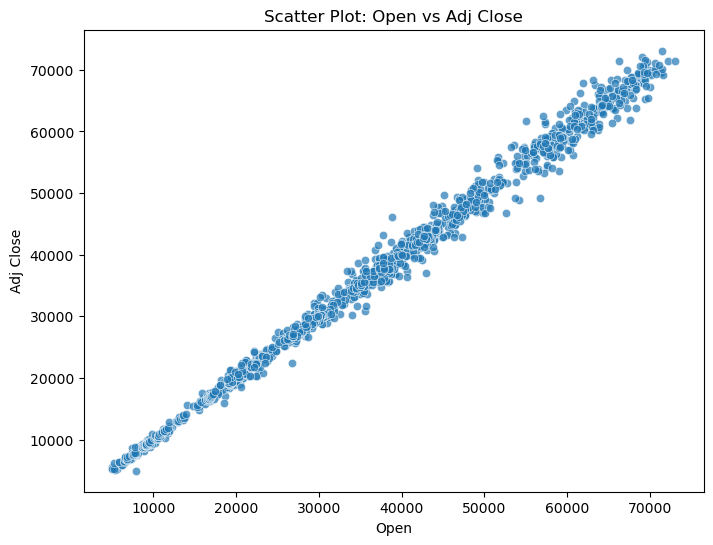

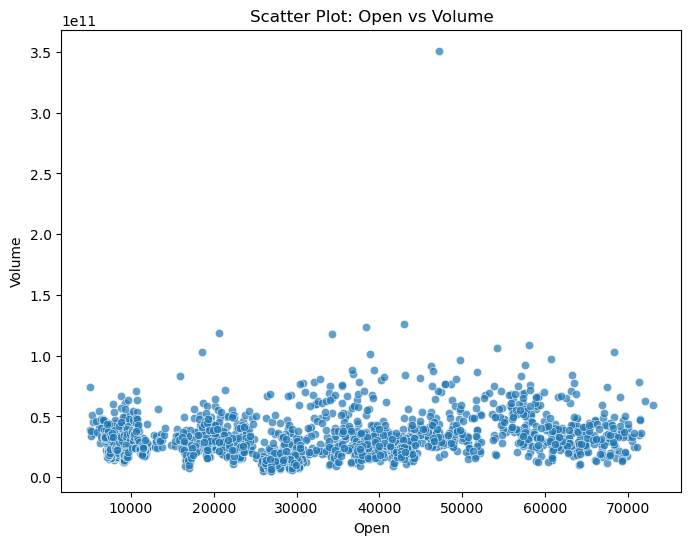

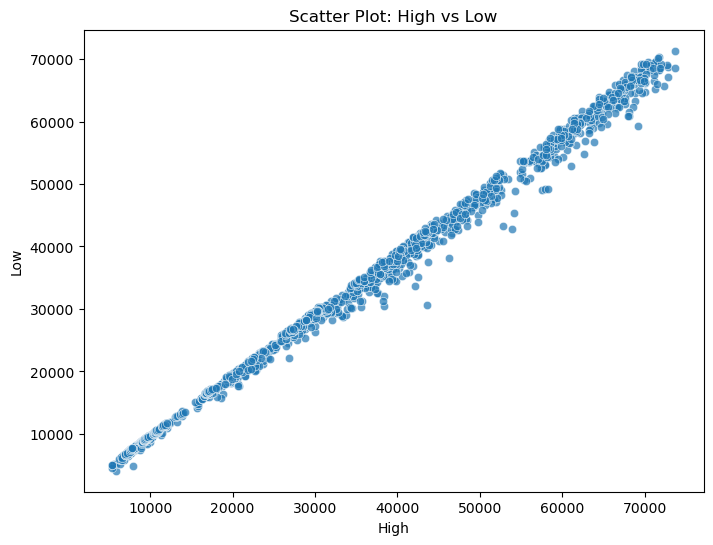

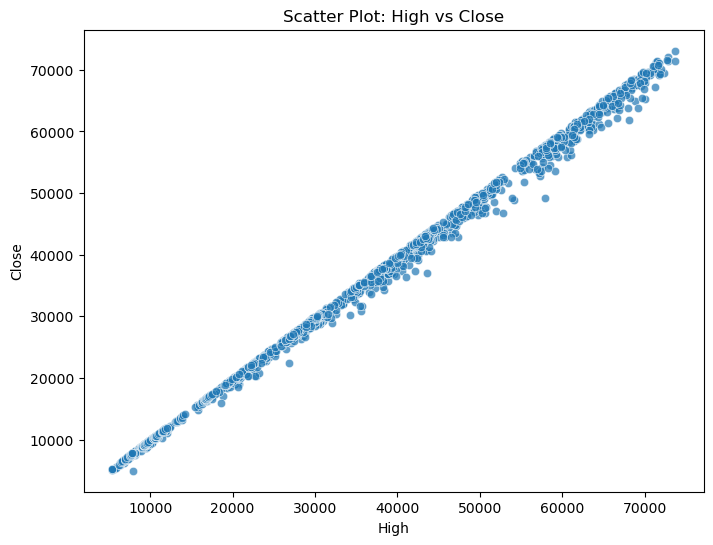

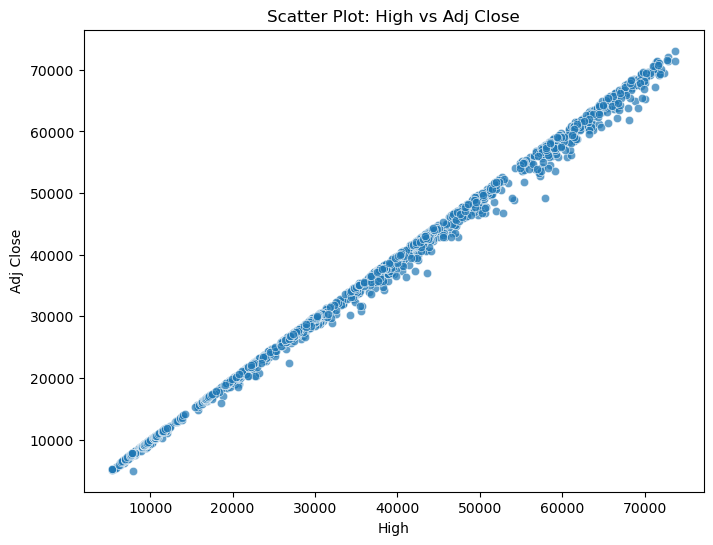

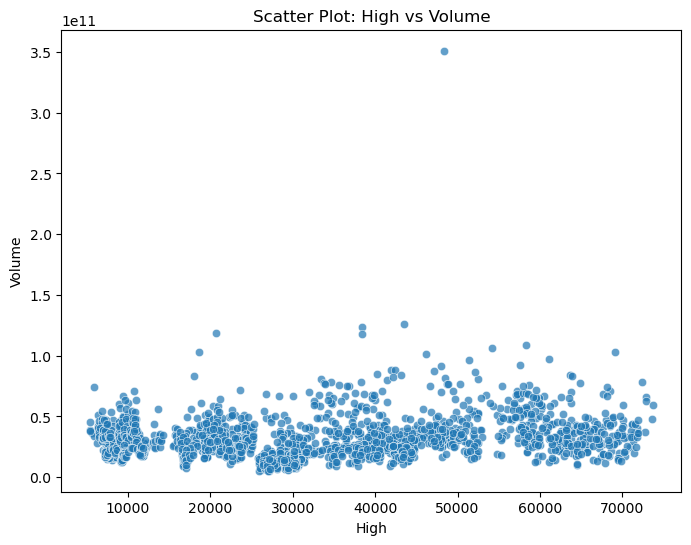

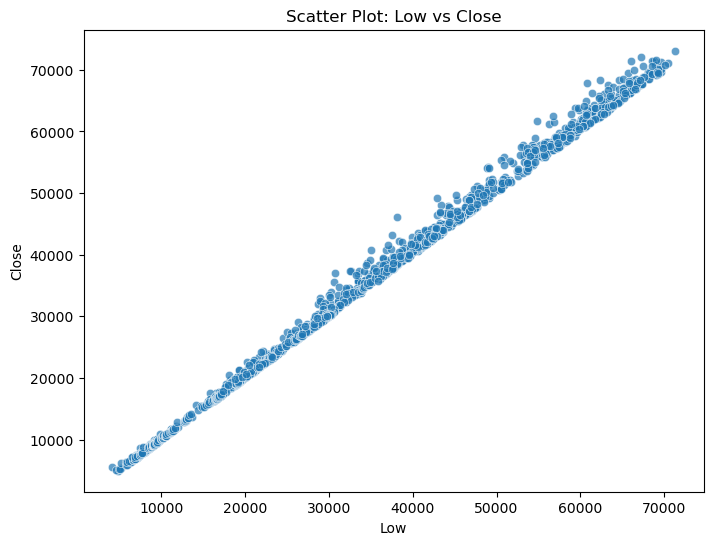

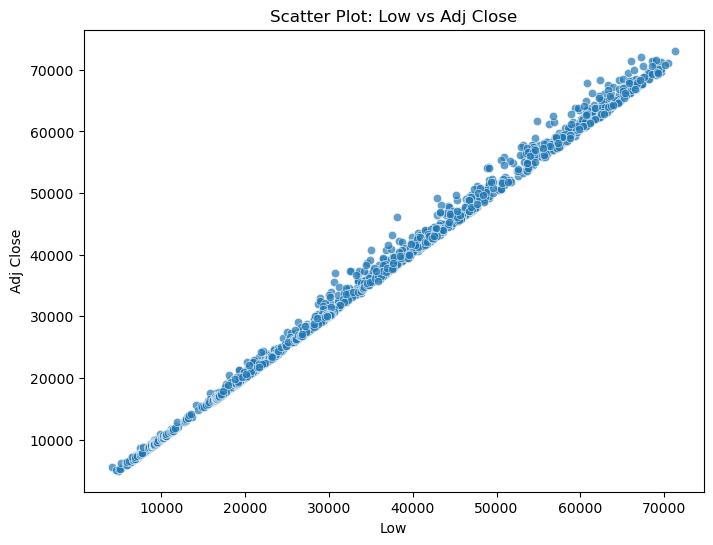

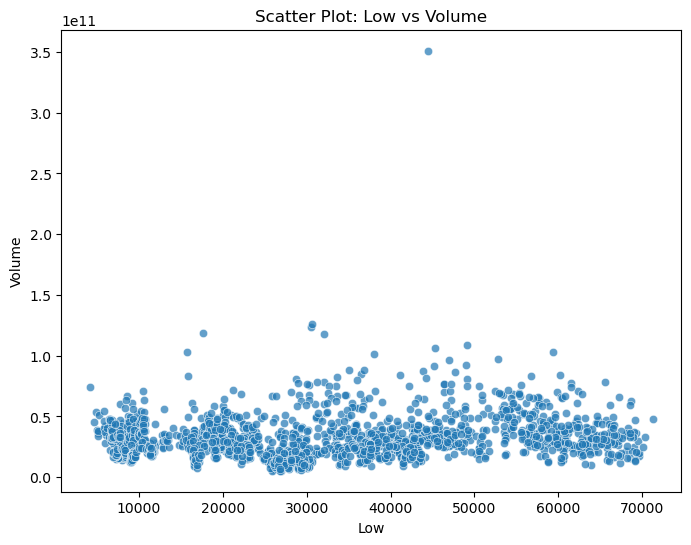

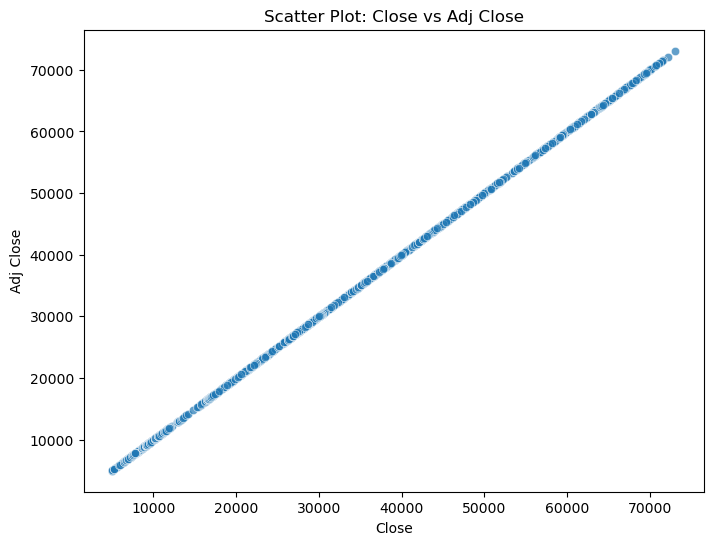

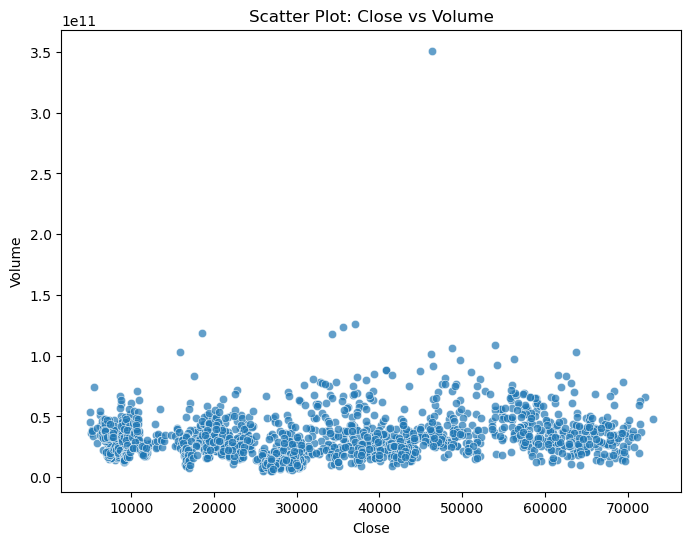

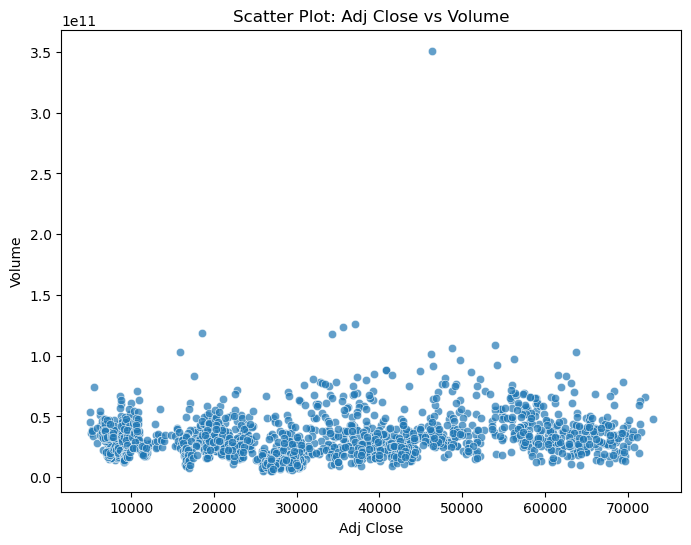

In [73]:
for i, var1 in enumerate(continuous_vars):
    for var2 in continuous_vars[i + 1:]:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[var1], y=df[var2], alpha=0.7)
        plt.title(f'Scatter Plot: {var1} vs {var2}')
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.show()



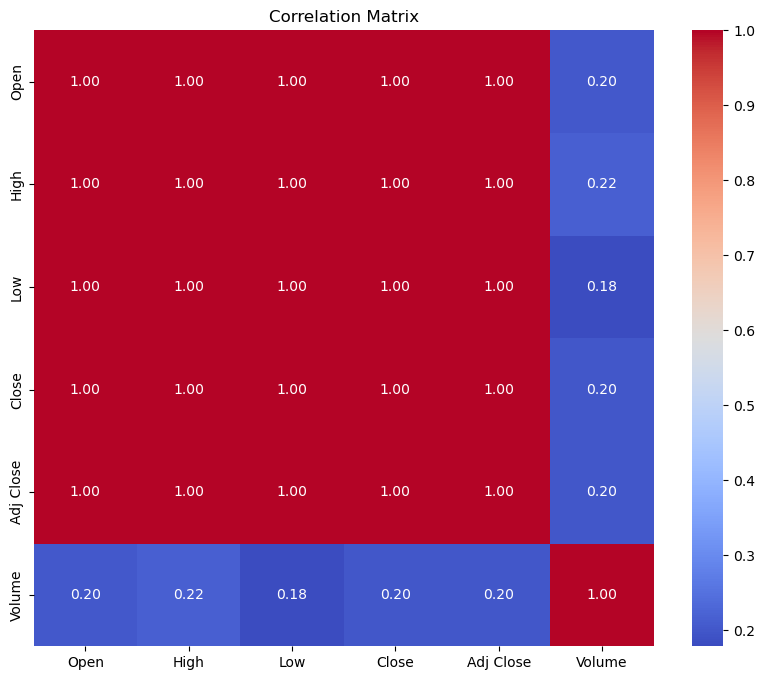

In [74]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[continuous_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



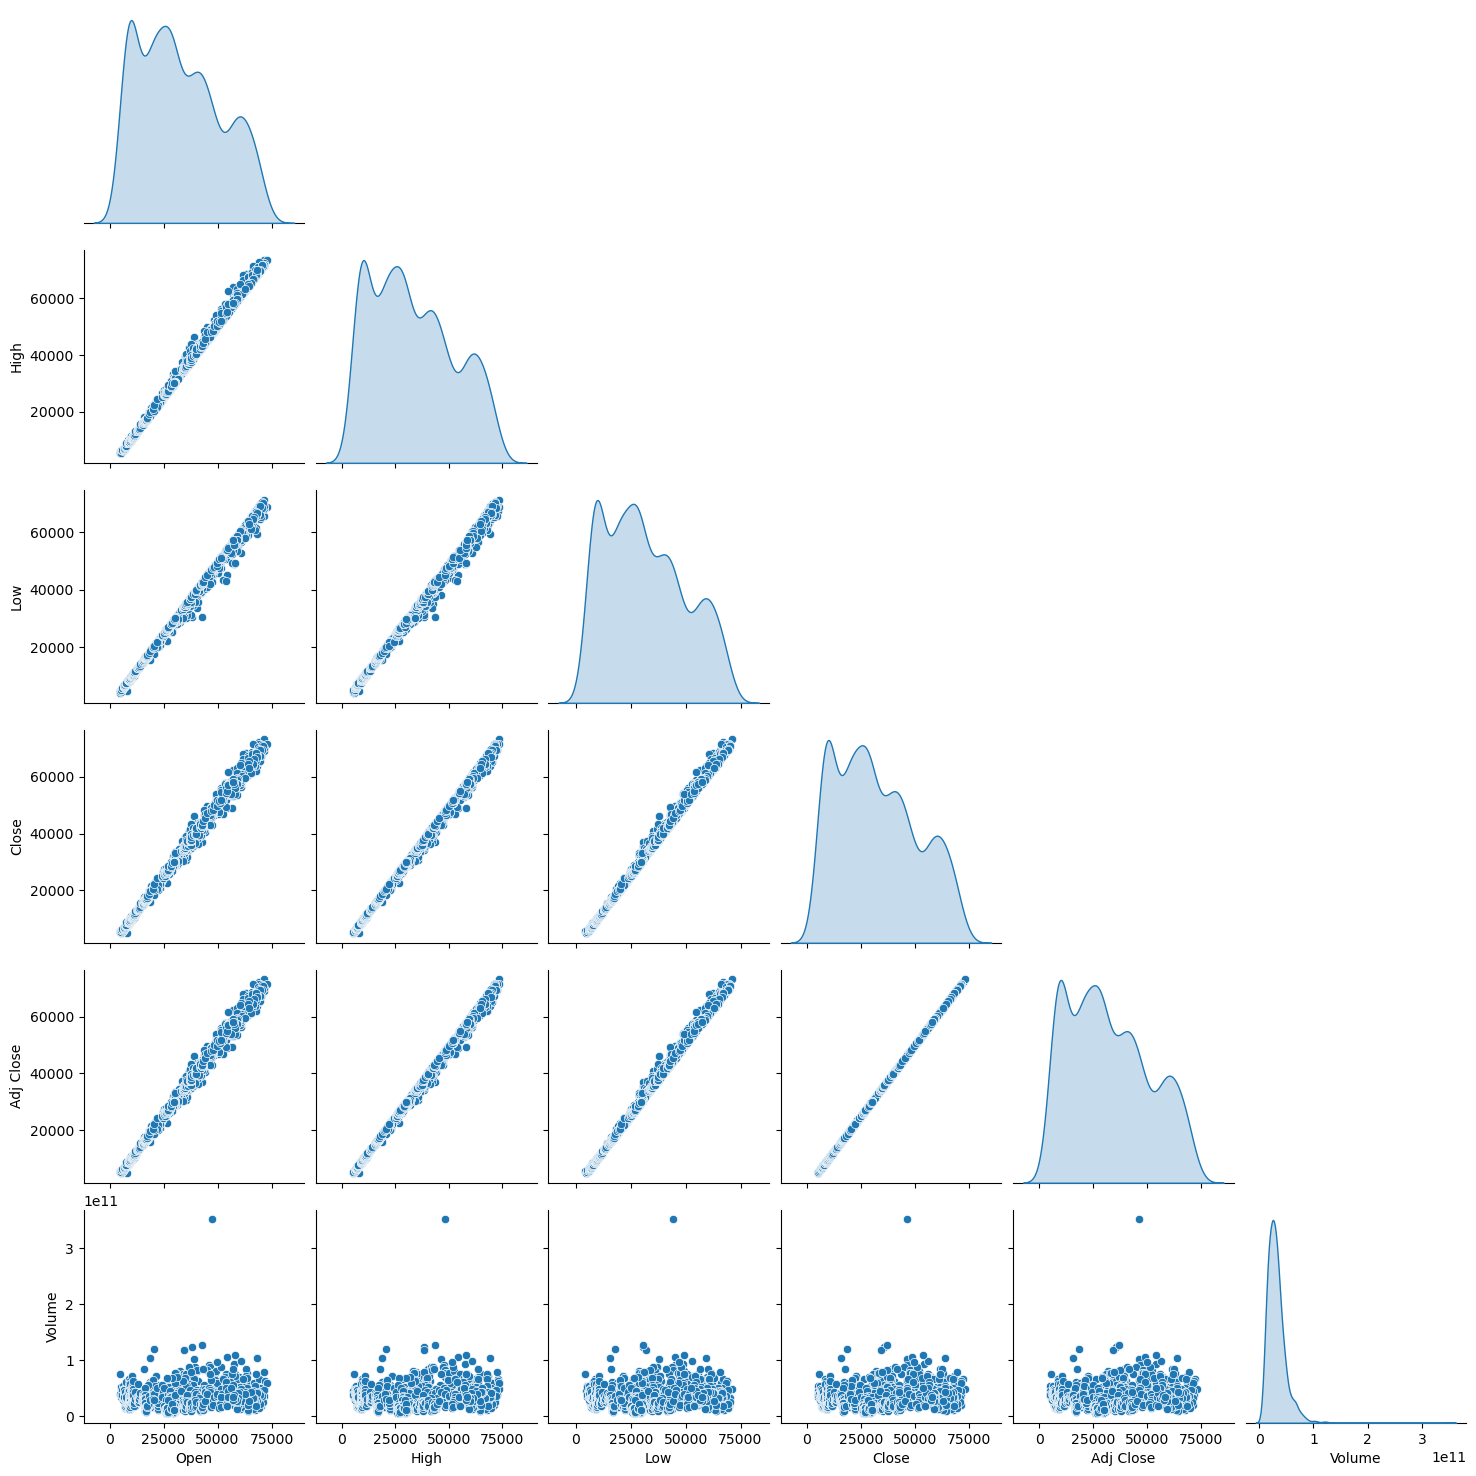

In [75]:
# Pair Plots for Multivariate Analysis
sns.pairplot(df[continuous_vars], diag_kind='kde', corner=True)
plt.show()


# Feature Analysis:

In [76]:
target = 'Close'

In [77]:
# Calculate correlations
for col in continuous_vars:
    corr = df[col].corr(df[target])
    print(f'Correlation between {col} and target (Close): {corr:.2f}')



Correlation between Open and target (Close): 1.00
Correlation between High and target (Close): 1.00
Correlation between Low and target (Close): 1.00
Correlation between Close and target (Close): 1.00
Correlation between Adj Close and target (Close): 1.00
Correlation between Volume and target (Close): 0.20


# **Models and Predection**

# Indicators


In [78]:
aroon_indicator = AroonIndicator(high=df['High'], low=df['Low'], window=14)
df['Aroon_Up'] = aroon_indicator.aroon_up()
df['Aroon_Down'] = aroon_indicator.aroon_down()

# RSI
rsi_indicator = RSIIndicator(close=df['Close'], window=14)
df['RSI'] = rsi_indicator.rsi()

# CCI
cci_indicator = CCIIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=14)
df['CCI'] = cci_indicator.cci()

# ADX
adx_indicator = ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=14)
df['ADX'] = adx_indicator.adx()

# EMA (e.g., 50-period EMA)
ema_indicator = EMAIndicator(close=df['Close'], window=50)
df['EMA_200'] = ema_indicator.ema_indicator()

# Feature Enginnering

In [79]:
# Add custom features
df['Range'] = df['High'] - df['Low']
df['Daily_Perc_Change'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['Volatility'] = df['Close'].rolling(window=7).std()

# Fill NaN values caused by rolling and indicator computations
df.fillna(method='bfill', inplace=True)

# Define target variables
target_high = df['High']
target_low = df['Low']

# Define feature columns
features = ['Open', 'Close', 'Volume', 'Range', 'Daily_Perc_Change', 'Volatility', 
            'Aroon_Up', 'Aroon_Down', 'RSI', 'CCI', 'ADX', 'EMA_200']
X = df[features]

C:\Users\Abdul\AppData\Local\Temp\ipykernel_17456\2310981733.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


# Splitting & Standardization

In [104]:
# Train-Test Split (70% training, 30% testing)
X_train, X_test, y_high_train, y_high_test, y_low_train, y_low_test = train_test_split(
    X, target_high, target_low, test_size=0.3, shuffle=False)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

~~further if any change is needed it may be applied depending upon the ML model that will be used, at this point I think Standardization wouold be a better option~~

# Models

# *BASELINE MODEL*


For evaluation 

In [81]:
baseline_high_pred = X_test['Close'].values
baseline_low_pred = X_test['Close'].values

baseline_high_rmse = np.sqrt(mean_squared_error(y_high_test, baseline_high_pred))
baseline_low_rmse = np.sqrt(mean_squared_error(y_low_test, baseline_low_pred))

print(f"Baseline High RMSE: {baseline_high_rmse}")
print(f"Baseline Low RMSE: {baseline_low_rmse}")

Baseline High RMSE: 1166.266922128593
Baseline Low RMSE: 1355.6034349252147


In [82]:
baseline_high_r2 = r2_score(y_high_test, baseline_high_pred)
baseline_low_r2 = r2_score(y_low_test, baseline_low_pred)

print(f"Baseline High R-squared: {baseline_high_r2}")
print(f"Baseline Low R-squared: {baseline_low_r2}")

Baseline High R-squared: 0.9950879904412986
Baseline Low R-squared: 0.9926118203407361


# *ML MODEL*

Using RandomForest as the ML Model for the project. Not using Linear Regression b/c it's not suitable for this type of data. As it does not capture non-linear relationships between the features and the target variable, which is a common thing in cryptocurrency data. Lastly, crypto data is highly volatile and has a lot of noise, so we need a model that can handle that efficently. Also from the previous analysis, we can see that the data features are highly correlated with each other, making them difficult to separate in the LR model.

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ...max_depth=10, max_features=None, n_estimators=50; total time=   0.3s
[CV] END ...max_depth=10, max_features=None, n_estimators=50; total time=   0.2s
[CV] END ...max_depth=10, max_features=None, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=10, max_features=None, n_estimators=100; total time=   0.7s
[CV] END ..max_depth=10, max_features=None, n_estimators=100; total time=   0.6s
[CV] END ..max_depth=10, max_features=None, n_estimators=100; total time=   0.5s
[CV] END ..max_depth=10, max_features=None, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=10, max_features=None, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=10, max_features=None, n_estimators=200; total time=   1.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_

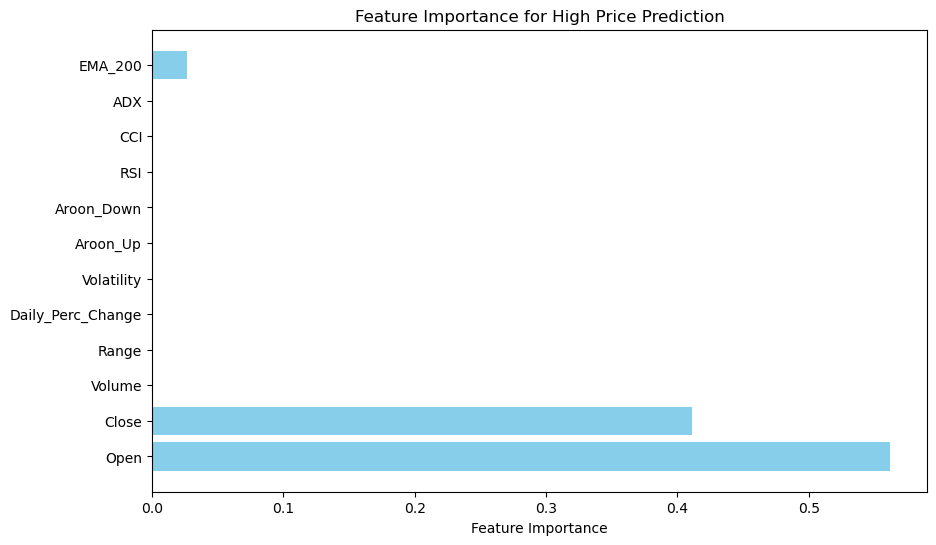

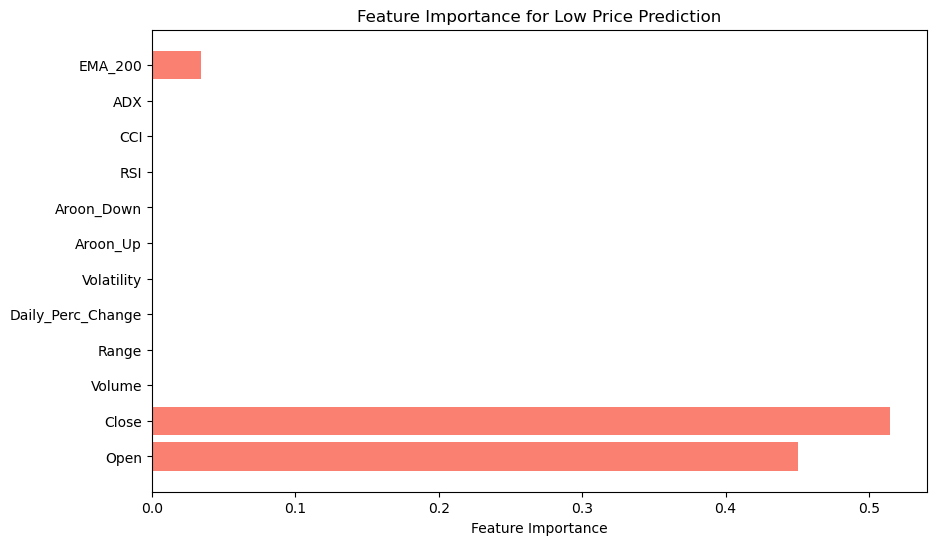

In [83]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'max_features': [None, 'sqrt', 'log2']
}

# Train and Tune Random Forest for High predictions
rf_high = RandomForestRegressor(random_state=42)
grid_high = GridSearchCV(estimator=rf_high, param_grid=param_grid, cv=3, 
                         scoring='neg_mean_squared_error', verbose=2, n_jobs=1)
grid_high.fit(X_train_scaled, y_high_train)

# Best model and parameters for High price
best_rf_high = grid_high.best_estimator_
print("Best RF Parameters (High):", grid_high.best_params_)

# Train and Tune Random Forest for Low predictions
rf_low = RandomForestRegressor(random_state=42)
grid_low = GridSearchCV(estimator=rf_low, param_grid=param_grid, cv=3, 
                        scoring='neg_mean_squared_error', verbose=2, n_jobs=1)
grid_low.fit(X_train_scaled, y_low_train)

# Best model and parameters for Low price
best_rf_low = grid_low.best_estimator_
print("Best RF Parameters (Low):", grid_low.best_params_)

# Predictions for High and Low
rf_high_pred = best_rf_high.predict(X_test_scaled)
rf_low_pred = best_rf_low.predict(X_test_scaled)

# Evaluation
rf_high_rmse = np.sqrt(mean_squared_error(y_high_test, rf_high_pred))
rf_low_rmse = np.sqrt(mean_squared_error(y_low_test, rf_low_pred))
rf_high_r2 = r2_score(y_high_test, rf_high_pred)
rf_low_r2 = r2_score(y_low_test, rf_low_pred)

print(f"Tuned Random Forest High RMSE: {rf_high_rmse}")
print(f"Tuned Random Forest Low RMSE: {rf_low_rmse}")
print(f"Tuned Random Forest High R-squared: {rf_high_r2}")
print(f"Tuned Random Forest Low R-squared: {rf_low_r2}")

# Save GridSearchCV Results for Analysis
results_high = pd.DataFrame(grid_high.cv_results_)
results_low = pd.DataFrame(grid_low.cv_results_)
results_high.to_csv("rf_high_tuning_results.csv", index=False)
results_low.to_csv("rf_low_tuning_results.csv", index=False)


print("Best RF Parameters (High):", grid_high.best_params_)
print("Best RF Parameters (Low):", grid_low.best_params_)




# Feature Importance for High Price Prediction
feature_importance_high = best_rf_high.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_high, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance for High Price Prediction")
plt.show()

# Feature Importance for Low Price Prediction
feature_importance_low = best_rf_low.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_low, color='salmon')
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Low Price Prediction")
plt.show()




In [85]:
rf_high_r2 = r2_score(y_high_test, rf_high_pred)
rf_low_r2 = r2_score(y_low_test, rf_low_pred)

print(f"Random Forest High R-squared: {rf_high_r2}")
print(f"Random Forest Low R-squared: {rf_low_r2}")


Random Forest High R-squared: 0.9921012622029386
Random Forest Low R-squared: 0.9930999665261379


# *DL MODEL*

Using LSTM as a deep learning model for this project. 

In [106]:
# Reshape data for LSTM [samples, timesteps, features]
look_back = 30  # Number of days to look back

def create_sequences(data, targets, look_back):
    sequences, target_list = [], []
    for i in range(len(data) - look_back):
        sequences.append(data[i:i+look_back])
        target_list.append(targets[i+look_back])
    return np.array(sequences), np.array(target_list)

X_train_lstm, y_high_train_lstm = create_sequences(X_train_scaled, y_high_train, look_back)
X_test_lstm, y_high_test_lstm = create_sequences(X_test_scaled, y_high_test, look_back)

X_train_lstm_low, y_low_train_lstm = create_sequences(X_train_scaled, y_low_train, look_back)
X_test_lstm_low, y_low_test_lstm = create_sequences(X_test_scaled, y_low_test, look_back)

# Define LSTM model architecture
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        LSTM(128, activation='relu'),
        Dropout(0.3),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Build and train the LSTM model for High price predictions
lstm_high = build_lstm_model((look_back, X_train_lstm.shape[2]))
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lstm_high.fit(X_train_lstm, y_high_train_lstm, 
              epochs=100, batch_size=32, validation_split=0.2, 
              callbacks=[early_stopping], verbose=1)

# Build and train the LSTM model for Low price predictions
lstm_low = build_lstm_model((look_back, X_train_lstm_low.shape[2]))
lstm_low.fit(X_train_lstm_low, y_low_train_lstm, 
             epochs=100, batch_size=32, validation_split=0.2, 
             callbacks=[early_stopping], verbose=1)

# Predictions
lstm_high_pred = lstm_high.predict(X_test_lstm).flatten()
lstm_low_pred = lstm_low.predict(X_test_lstm_low).flatten()

# Evaluation
lstm_high_rmse = np.sqrt(mean_squared_error(y_high_test_lstm, lstm_high_pred))
lstm_low_rmse = np.sqrt(mean_squared_error(y_low_test_lstm, lstm_low_pred))
lstm_high_r2 = r2_score(y_high_test_lstm, lstm_high_pred)
lstm_low_r2 = r2_score(y_low_test_lstm, lstm_low_pred)

print(f"LSTM High RMSE: {lstm_high_rmse}")
print(f"LSTM Low RMSE: {lstm_low_rmse}")
print(f"LSTM High R-squared: {lstm_high_r2}")
print(f"LSTM Low R-squared: {lstm_low_r2}")


C:\Users\Abdul\AppData\Local\Temp\ipykernel_17456\2164497050.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_list.append(targets[i+look_back])
c:\Users\Abdul\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 1257454720.0000 - val_loss: 352105536.0000
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 373651552.0000 - val_loss: 83316624.0000
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 142756256.0000 - val_loss: 32287222.0000
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 99930000.0000 - val_loss: 28730906.0000
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 97023440.0000 - val_loss: 28577332.0000
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 78096488.0000 - val_loss: 33341588.0000
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 79965064.0000 - val_loss: 25530232.0000
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 70325000.0000 - val_loss: 19805018.0000
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 61201832.0000 - val_loss: 10793192.0000
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 66713148.0000 - val_loss: 11208722

# **Results**

Random Forest

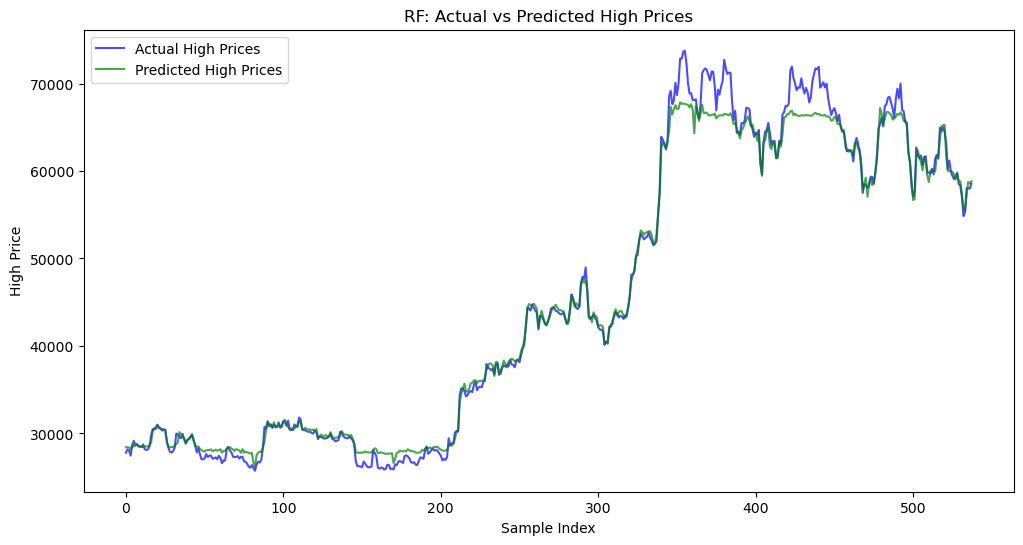

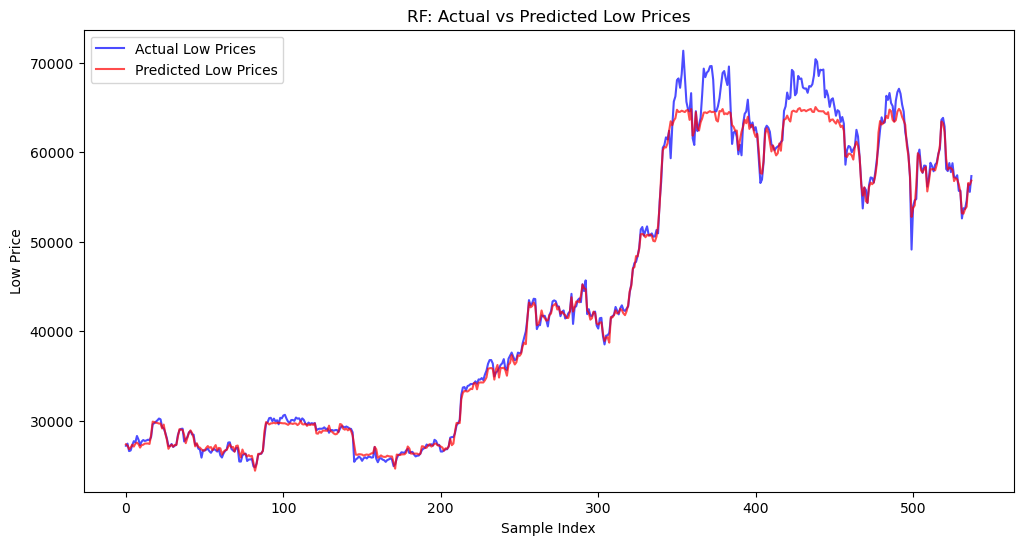

In [84]:
# Plotting Random Forest - Actual vs Predicted for High Prices
plt.figure(figsize=(12, 6))

# Plot Actual vs Predicted High Prices
plt.plot(y_high_test.values, label='Actual High Prices', color='blue', alpha=0.7)
plt.plot(rf_high_pred, label='Predicted High Prices', color='green', alpha=0.7)

# Adding labels and title for High Prices
plt.title("RF: Actual vs Predicted High Prices")
plt.xlabel("Sample Index")
plt.ylabel("High Price")
plt.legend()

# Show plot
plt.show()

# Plotting Random Forest - Actual vs Predicted for Low Prices
plt.figure(figsize=(12, 6))

# Plot Actual vs Predicted Low Prices
plt.plot(y_low_test.values, label='Actual Low Prices', color='blue', alpha=0.7)
plt.plot(rf_low_pred, label='Predicted Low Prices', color='red', alpha=0.7)

# Adding labels and title for Low Prices
plt.title("RF: Actual vs Predicted Low Prices")
plt.xlabel("Sample Index")
plt.ylabel("Low Price")
plt.legend()

# Show plot
plt.show()

LSTM

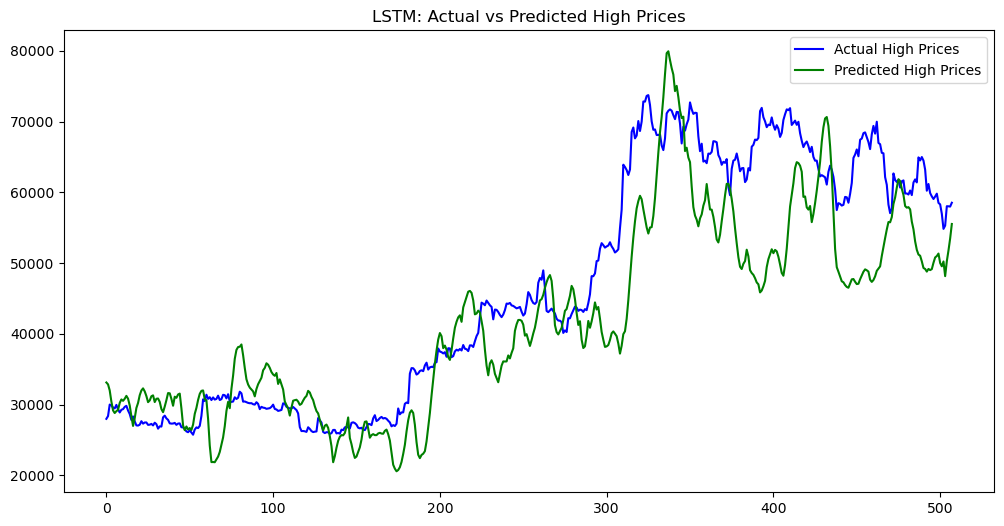

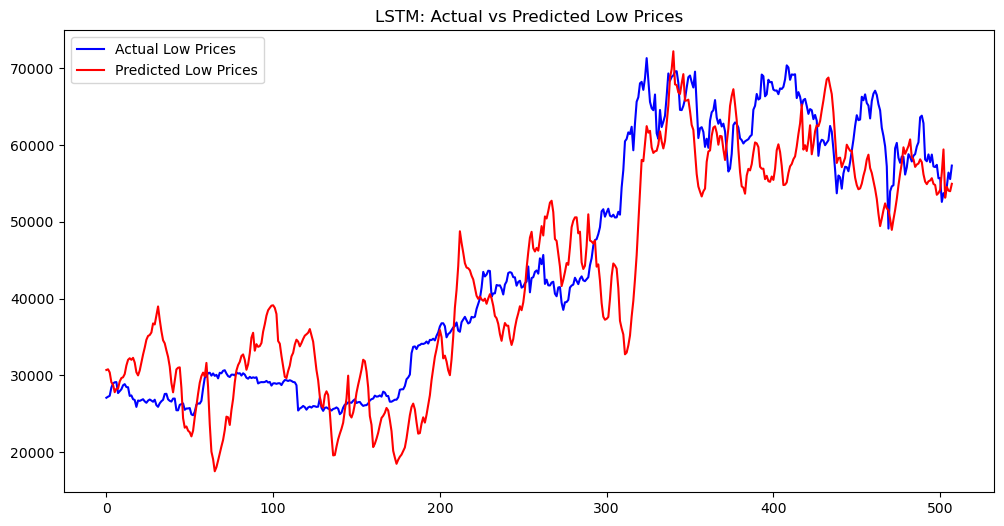

In [102]:
# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_high_test_lstm, label='Actual High Prices', color='blue')
plt.plot(lstm_high_pred, label='Predicted High Prices', color='green')
plt.title("LSTM: Actual vs Predicted High Prices")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_low_test_lstm, label='Actual Low Prices', color='blue')
plt.plot(lstm_low_pred, label='Predicted Low Prices', color='red')
plt.title("LSTM: Actual vs Predicted Low Prices")
plt.legend()
plt.show()

Comparison of Scores

           Model    High RMSE     Low RMSE
0       Baseline  1166.266922  1355.603435
1  Random Forest  1478.928592  1310.055020
2           LSTM  6476.539502  6841.656909


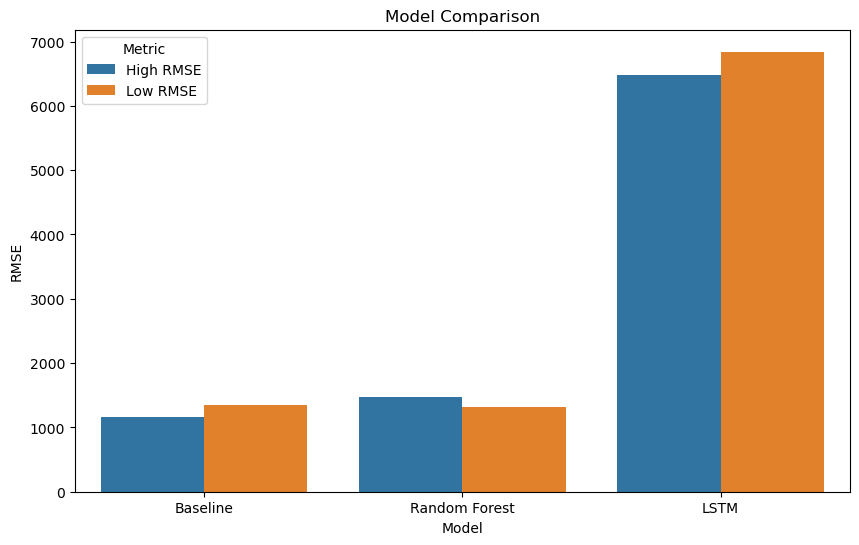

In [109]:
results = pd.DataFrame({
    'Model': ['Baseline', 'Random Forest', 'LSTM'],
    'High RMSE': [baseline_high_rmse, rf_high_rmse, lstm_high_rmse],
    'Low RMSE': [baseline_low_rmse, rf_low_rmse, lstm_low_rmse]
})
print(results)

# Plot Results
plt.figure(figsize=(10, 6))
sns.barplot(data=results.melt(id_vars='Model', var_name='Metric', value_name='RMSE'), x='Model', y='RMSE', hue='Metric')
plt.title('Model Comparison')
plt.ylabel('RMSE')
plt.show()


Randomforest gives much better results as its scores are closer to that of the baseline model